<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab3/exercitiu_laborator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

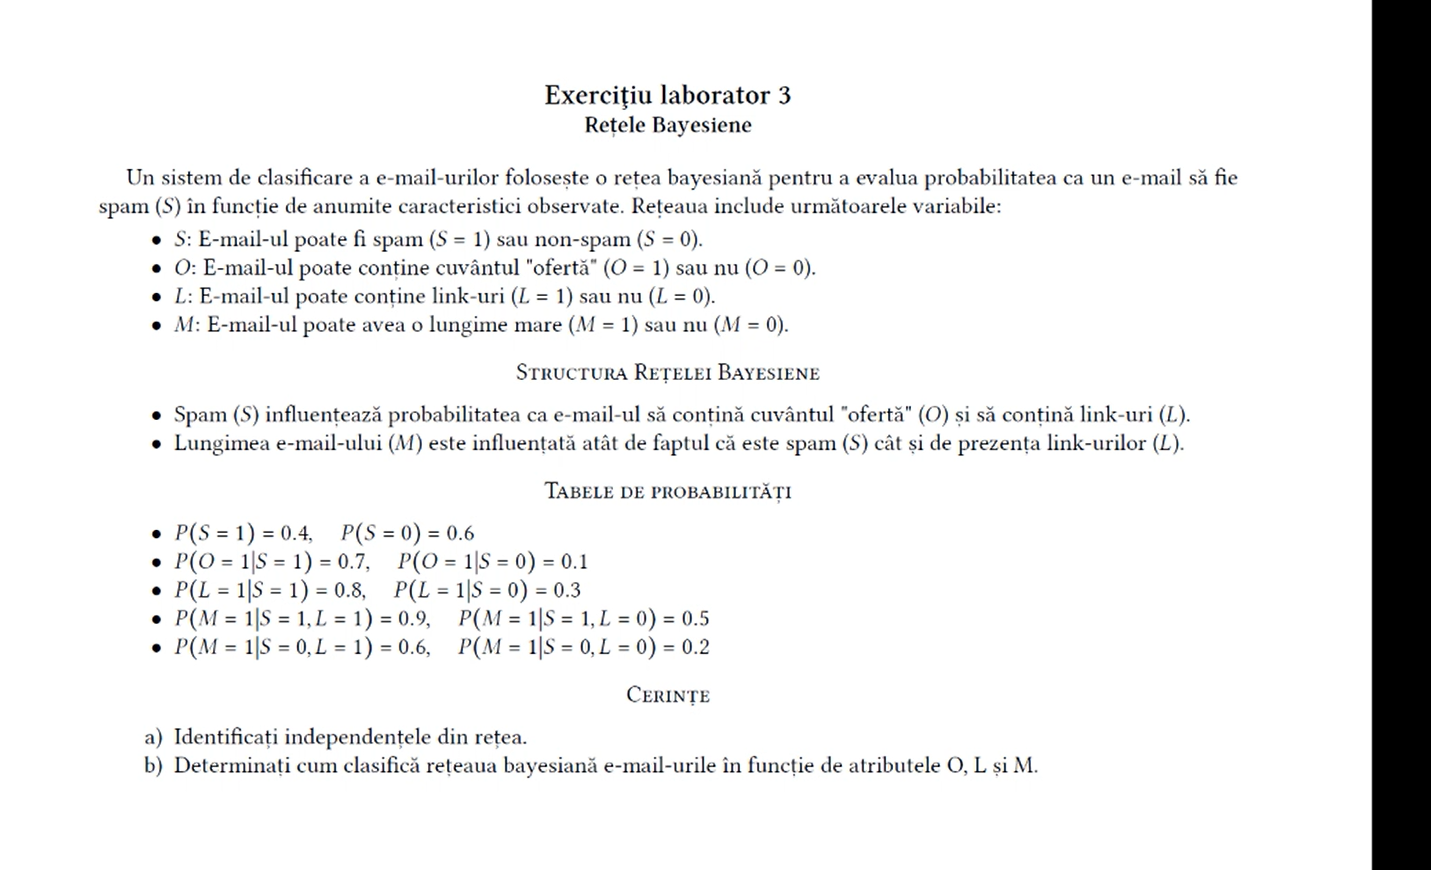

In [ ]:
!pip install pgmpy

Independențele locale pentru S:


Independențele locale pentru O:
(O ⟂ L, M | S)

Independențele locale pentru L:
(L ⟂ O | S)

Independențele locale pentru M:
(M ⟂ O | S, L)



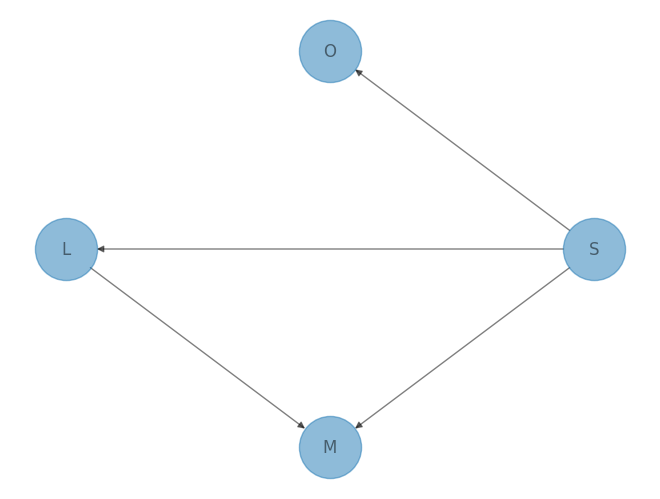

In [12]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
model = BayesianNetwork([
    ('S', 'O'),
    ('S', 'L'),
    ('S', 'M'),
    ('L', 'M')
])
pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

cpd_s = TabularCPD(variable='S', variable_card=2, values=[[0.6], [0.4]])

cpd_o = TabularCPD(variable='O', variable_card=2,
                   values=[[0.9, 0.3], [0.1, 0.7]], evidence=['S'], evidence_card=[2])

cpd_l = TabularCPD(variable='L', variable_card=2,
                   values=[[0.7, 0.2], [0.3, 0.8]], evidence=['S'], evidence_card=[2])

cpd_m = TabularCPD(variable='M', variable_card=2,
                   values=[[0.8, 0.4, 0.5, 0.1], [0.2, 0.6, 0.5, 0.9]],
                   evidence=['S', 'L'], evidence_card=[2, 2])

model.add_cpds(cpd_s, cpd_o, cpd_l, cpd_m)

model.check_model()

for var in model.nodes():
    print(f"Independențele locale pentru {var}:")
    print(model.local_independencies(var))
    print()


In [13]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
for i in range(2):
  for j in range(2):
    for k in range(2):
      posterior_p = infer.query(["S"], evidence={"O": i,"L": j, "M": k})
      print(posterior_p)


+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.9618 |
+------+----------+
| S(1) |   0.0382 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8630 |
+------+----------+
| S(1) |   0.1370 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8710 |
+------+----------+
| S(1) |   0.1290 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5294 |
+------+----------+
| S(1) |   0.4706 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.5455 |
+------+----------+
| S(1) |   0.4545 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.2308 |
+------+----------+
| S(1) |   0.7692 |
+------+----------+
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.2432 |
+------+----------+
| S(1) |   0.7568 |
+------+----------+
+------+----------+
